In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch 
import random
from skimage.util import random_noise
import cv2
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def median_filter(data, kernel_size):
    temp = []
    indexer = kernel_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(kernel_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(kernel_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(kernel_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

In [ ]:
def speckle(img) :
  hasil = torch.tensor(random_noise(img, mode='speckle', mean=0, var=0.05, clip=True))
  hasil = hasil.numpy()
  return hasil 

In [ ]:
norm_factor = 255.

In [ ]:
path = '/content/drive/MyDrive/S4.PFE1/data/test/denoised'
imageList = os.listdir(path)
LR_images_list_test = []
HR_images_list_test = []
all_denoised_images = []
kernel_size = 11

for image in (imageList):
            picture = cv2.imread(os.path.join(path,image))
         #   plt.imshow(picture)
            picture = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY)
            picture = picture.astype(np.float32)/norm_factor 
          #  plt.imshow(picture)
        #    picture = (picture.astype(np.float32) - 127.5)/127.5
            picture = cv2.resize(picture,(56,56))
            picture = np.array(picture)
            picture_noisy = speckle(picture)
            picture_denoised = median_filter(picture_noisy, kernel_size)
            HR_images_list_test.append(picture)
            LR_images_list_test.append(picture_noisy)
            all_denoised_images.append(picture_denoised)

In [ ]:
HR_images_list_test = np.array(HR_images_list_test)
LR_images_list_test = np.array(LR_images_list_test)
all_denoised_images = np.array(all_denoised_images)

In [ ]:
dimension = HR_images_list_test.shape[1]
dimension

56

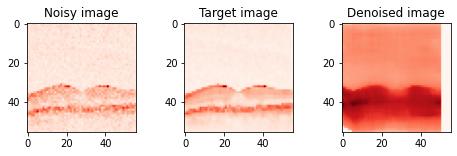

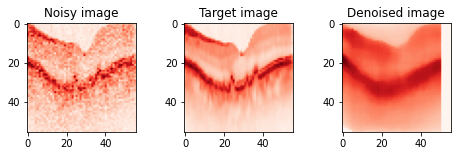

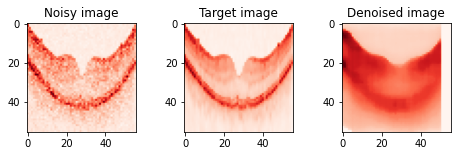

In [ ]:
n = 3
for i in range(n):
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(8, 2)
    axes[0].set_title('Noisy image')
    im0 = axes[0].imshow(LR_images_list_test[i].reshape(dimension, dimension), cmap = 'Reds') #, cmap = 'Reds'
    axes[1].set_title('Target image')
    im1 = axes[1].imshow(HR_images_list_test[i].reshape(dimension, dimension), cmap = 'Reds') #, cmap = 'Reds'
    axes[2].set_title('Denoised image')
    im2 = axes[2].imshow(all_denoised_images[i].reshape(dimension, dimension), cmap = 'Reds') #, cmap = 'Reds'
    

In [ ]:
psnr = tf.image.psnr(all_denoised_images,LR_images_list_test, max_val = 1)
psnr

<tf.Tensor: shape=(), dtype=float32, numpy=17.132654>